## Multiple Linear Regression: using sklearn

In this , we are going to predict stock index price by giving interest rate and unemployment rate. 

In [10]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt


1. reading the data using pandas DataFrame.
2. plotting the relationship between independent variables and dependent variable
3. Modelling the dataset using sklearn - LinearRegression.
4. Predicting the stock index price with respect to interest rate and unemployment rate
5. Using OLS to visualize the Rsquare , coeff, pvalues etc... to check the accuracy and relationship

### Step 1:

In [11]:
#Reading stock index dataset
Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

stockData = pd.DataFrame(Stock_Market,columns = ['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price'])
stockData

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256
5,2017,7,2.50,5.6,1254
6,2017,6,2.50,5.5,1234
7,2017,5,2.25,5.5,1195
8,2017,4,2.25,5.5,1159
9,2017,3,2.25,5.6,1167


In [28]:
Interest_Rate = stockData.iloc[:,2]
X1 = Interest_Rate.values.reshape(-1,1)
Unemployment_Rate = stockData.iloc[:,3]
X2 = Unemployment_Rate.values.reshape(-1,1)
y = stockData.iloc[:,-1]


### Step 2:

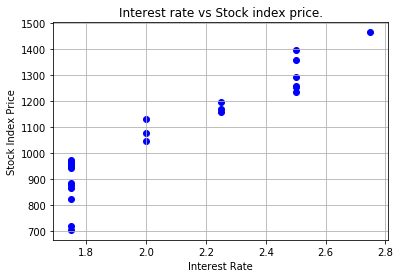

when Interest rate increases , value of the Stock Index Price also increase


In [35]:
#Plotting the relationships btw Interest rate and stock Index price
plt.scatter(X1,y,color = 'blue')
plt.title('Interest rate vs Stock index price.')
plt.xlabel('Interest Rate')
plt.ylabel('Stock Index Price')
plt.grid(True)
plt.show()
print('when Interest rate increases , value of the Stock Index Price also increase') #positive slope

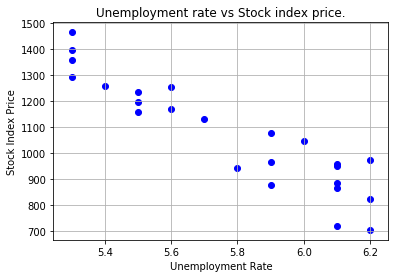

when Unemploment rate increases , value of the Stock index price get decrease


In [36]:
plt.scatter(X2,y,color = 'blue')
plt.title('Unemployment rate vs Stock index price.')
plt.xlabel('Unemployment Rate')
plt.ylabel('Stock Index Price')
plt.grid(True)
plt.show()
print('when Unemploment rate increases , value of the Stock index price get decrease') #negative slope

### Step 3:

In [59]:
# Independent variables or predictors
X = stockData[['Interest_Rate','Unemployment_Rate']]


In [60]:
#Linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [62]:
#fitting the dataset to the model
regressor = LinearRegression().fit(X,y)
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [66]:
print('Intercept :',regressor.intercept_)
print('Coefficents: Interest_rate = {} , Unemployment_rate = {} '.format(regressor.coef_[0],regressor.coef_[1]))

Intercept : 1798.403977625855
Coefficents: Interest_rate = 345.54008701056557 , Unemployment_rate = -250.14657136938058 


### Step 4:

In [81]:
#predicting with the new data
new_interest_rate = 7.3
new_unemployment_rate = 9.1
print('Predicted Stock index price :{}'.format(regressor.predict([[new_interest_rate,new_unemployment_rate]])))

Predicted Stock index price :[2044.51281334]


### Step 5:

In [82]:
#Using Ordinary Least Square Table
import statsmodels.api as sm
X = sm.add_constant(X)

In [83]:
model = sm.OLS(y,X).fit()
model

In [84]:
prediction = model.predict(X)

In [85]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Stock_Index_Price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Wed, 07 Aug 2019   Prob (F-statistic):           4.04e-11
Time:                        10:59:10   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1798.4040    899.248      2.000      0.059     -71.685    3668.493
Interest_Rate       345.5401    111.367      3.103      0.005     113.940     577.140
Unemployment_Rate  -250.1466    117.950     -2.121      0.046    -495.437      -4.856
==============================================================================
Omnibus:                        2.691   Durbin-Watson:                   0.530
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.551
Skew:                          -0.612   Prob(JB):                        0.461
Kurtosis:                       3.226   Cond. No.                         394.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

 Equation : Stock_index_Price = 1798.4040 + 345.5401 * (Interest_rate) - 250.1466 * (Unemployment_Rate)